In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from __future__ import division
from matplotlib import cm
from matplotlib import patches
from pprint import pprint
from pymongo import MongoClient

TABLE = 'tweets_04_06_09'
MIN_PERCENTAGE = .01

In [2]:
c = MongoClient()
db = c['social_database_test']
table = db[TABLE]

In [3]:
df = pd.DataFrame(columns=['id', 'name', 'screen_name', 'lang', 
                           'statuses_count', 'created_at', 'tweets', 
                           'retweets', 'favourites_count', 'hashtags'])

for user in table.find({}):
    df = df.append({'id': user['user']['id'], 'name': user['user']['name'], 
                    'screen_name': user['user']['screen_name'], 
                    'lang': user['general']['lang'], 
                    'statuses_count': user['user']['statuses_count'], 
                    'created_at': user['user']['created_at'], 
                    'tweets': user['general']['tweets'], 
                    'retweets': user['general']['retweets'], 
                    'favourites_count': user['user']['favourites_count'], 
                    'hashtags': user['hashtags']}, ignore_index=True)

# Plotting tweets per user distribution

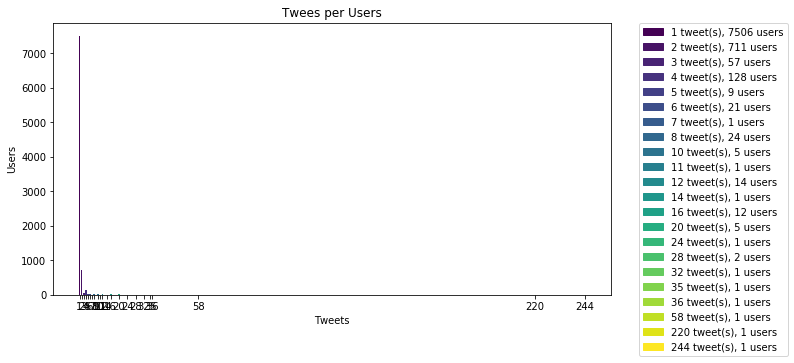

In [4]:
tweets_vc = dict(df['tweets'].value_counts())
labels = list()

for i in range(0, len(tweets_vc.keys())):
    label = str(tweets_vc.keys()[i]) + ' tweet(s), ' + str(tweets_vc.values()[i]) + ' users'
    labels.append(label)

fig, ax = plt.subplots(figsize=(10, 5))
cmap = cm.get_cmap('viridis', len(tweets_vc.keys())).colors
patch = [patches.Patch(color=cmap[i], label=labels[i]) 
         for i in range(0, len(tweets_vc.keys()))]
ax.bar(x=tweets_vc.keys(), height=tweets_vc.values(), 
       tick_label=tweets_vc.keys(), color=cmap)
plt.title('Twees per Users')
plt.xlabel('Tweets')
plt.ylabel('Users')
plt.legend(handles=patch, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Plotting hashtags distribution

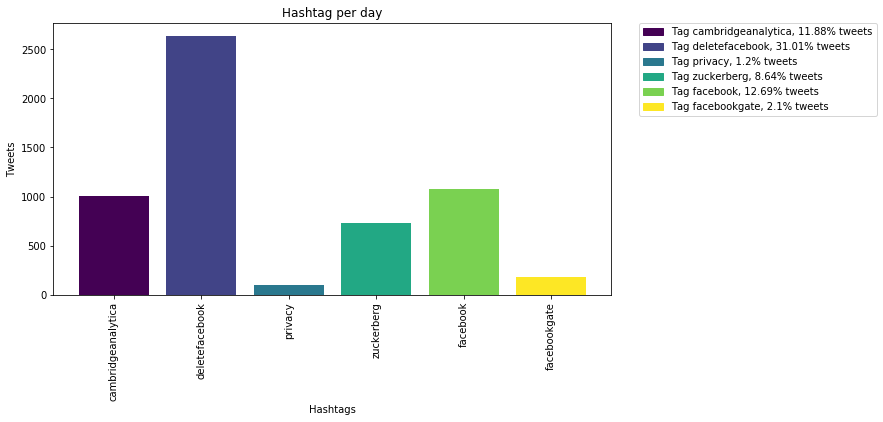

In [19]:
tags = dict()

for record in df.as_matrix():
    rtags = [t.lower() for t in record[-1]]
    
    for rt in rtags:
        if rt not in tags:
            tags[rt] = 1
        else:
            tags[rt] += 1

filtered_tags = dict()

for t in tags:
    if tags[t]/len(df) >= MIN_PERCENTAGE:
        filtered_tags[t] = tags[t]

cmap = cm.get_cmap('viridis', len(filtered_tags.keys())).colors
patch = [patches.Patch(color=cmap[i], 
         label='Tag ' + filtered_tags.keys()[i] + ', ' + 
         str(round((filtered_tags.values()[i]/len(df))*100, 2)) + '% tweets') 
         for i in range(0, len(filtered_tags.keys()))]
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(filtered_tags.keys(), filtered_tags.values(), 
              color=cmap)
plt.title('Hashtag per day')
plt.xticks(range(0, len(filtered_tags.keys())), filtered_tags.keys(), 
           rotation=90)
plt.xlabel('Hashtags')
plt.ylabel('Tweets')
plt.legend(handles=patch, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()